In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import statistics as st
import arviz as az
import bambi as bmb
import pymc as pm
from pymc import HalfNormal, Model, Normal, sample
import statsmodels.api as sm
import networkx as nx
import graphviz
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 12345
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

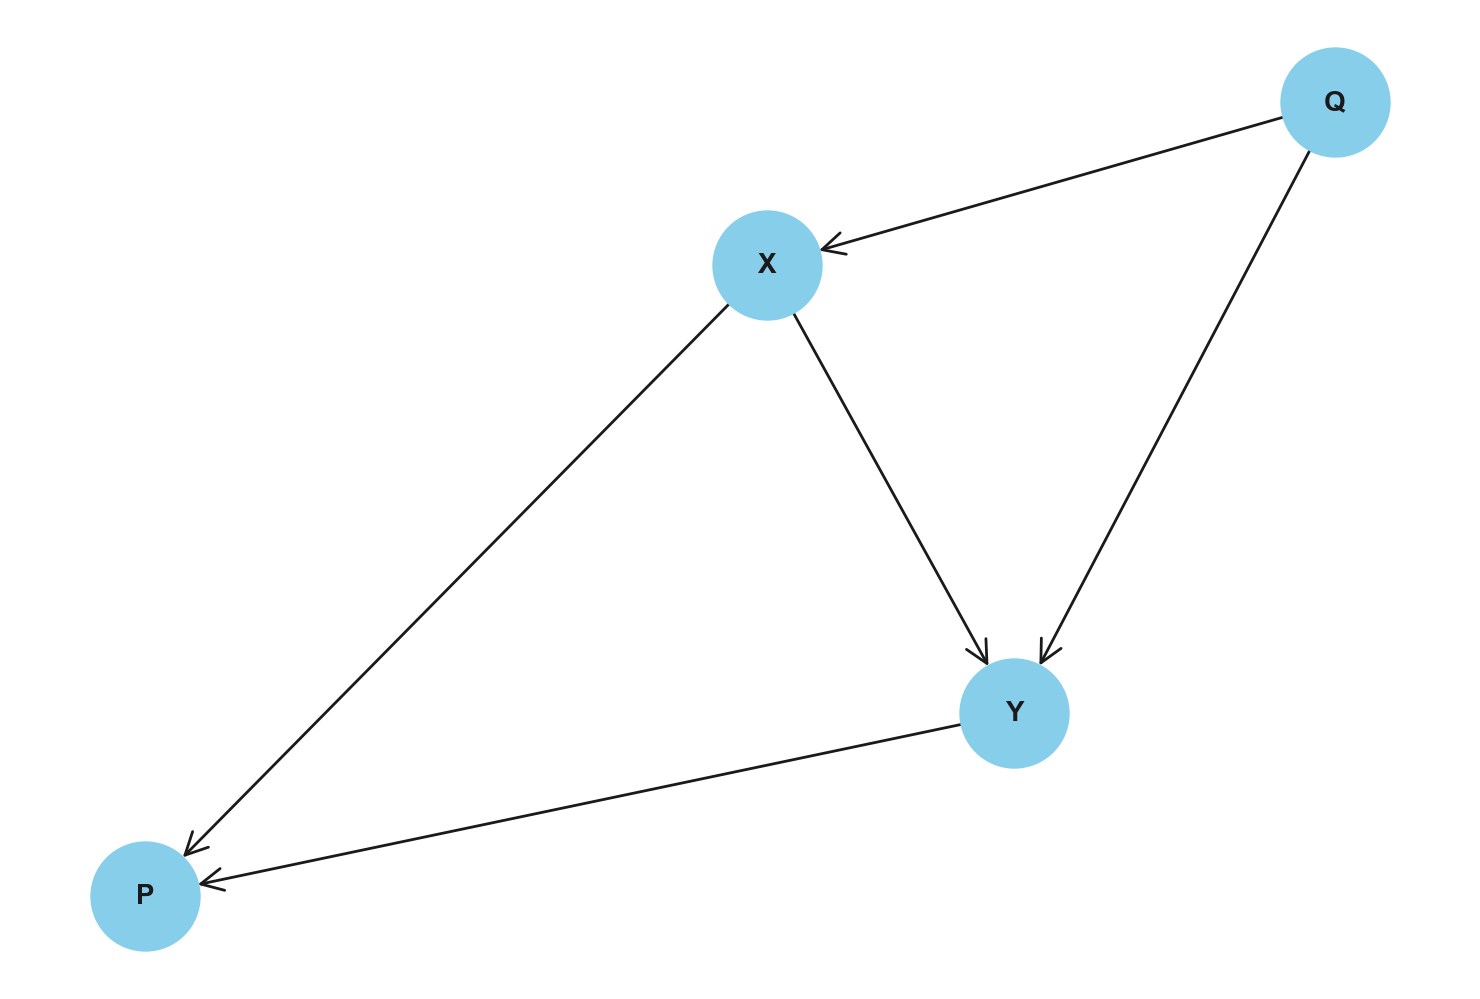

In [3]:
graph = nx.DiGraph()
#graph.add_edges_from([("root", "a"), ("a", "b"), ("a", "e"), ("b", "c"), ("b", "d"), ("d", "e")])
graph.add_edges_from([("X", "Y"), ("X", "P"), ("Y", "P"), ("Q", "X"), ("Q", "Y")])

# Draw the graph
pos = nx.spring_layout(graph, seed=42)  # Position nodes using spring layout algorithm
nx.draw(graph, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=20, arrowstyle="->")
plt.show()

In [4]:
N = 5_000
Q = rng.normal(size=N)
X = rng.normal(loc=0.14*Q, scale=0.4, size=N)
Y = rng.normal(loc=0.7*X + 0.11*Q, scale=0.24, size=N)
P = rng.normal(loc=0.43*X + 0.21*Y, scale=0.22, size=N)
df = pd.DataFrame({"Q": Q, "X": X, "Y": Y, "P": P})

df.head()

,Q,X,Y,P
0,-1.423825,-0.421305,-0.498653,0.039523
1,1.263728,0.518683,0.576752,0.059713
2,-0.870662,0.354544,0.157422,0.367875
3,-0.259173,0.135539,0.307791,0.016444
4,-0.075343,-0.048982,0.114759,0.134512


In [5]:
model = bmb.Model("Y ~ X", df)
results = model.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:02.360732


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:  35%|██████████████████▌                                  | 700/2000 [00:01<00:00, 6753.04it/s]

Running chain 2:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 7616.14it/s]

Running chain 1:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 7464.92it/s]

Running chain 0:  45%|███████████████████████▊                             | 900/2000 [00:01<00:00, 8379.89it/s]

Running chain 1:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:01<00:00, 8861.28it/s]

Running chain 0:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:01<00:00, 9176.39it/s]

Running chain 3:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:01<00:00, 8876.39it/s]

Running chain 2:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:01<00:00, 9142.57it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1261.17it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1261.98it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1262.88it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1263.78it/s]


Sampling time = 0:00:01.914386


Transforming variables...


Transformation time = 0:00:00.065601


Computing Log Likelihood...


Log Likelihood time = 0:00:00.198931


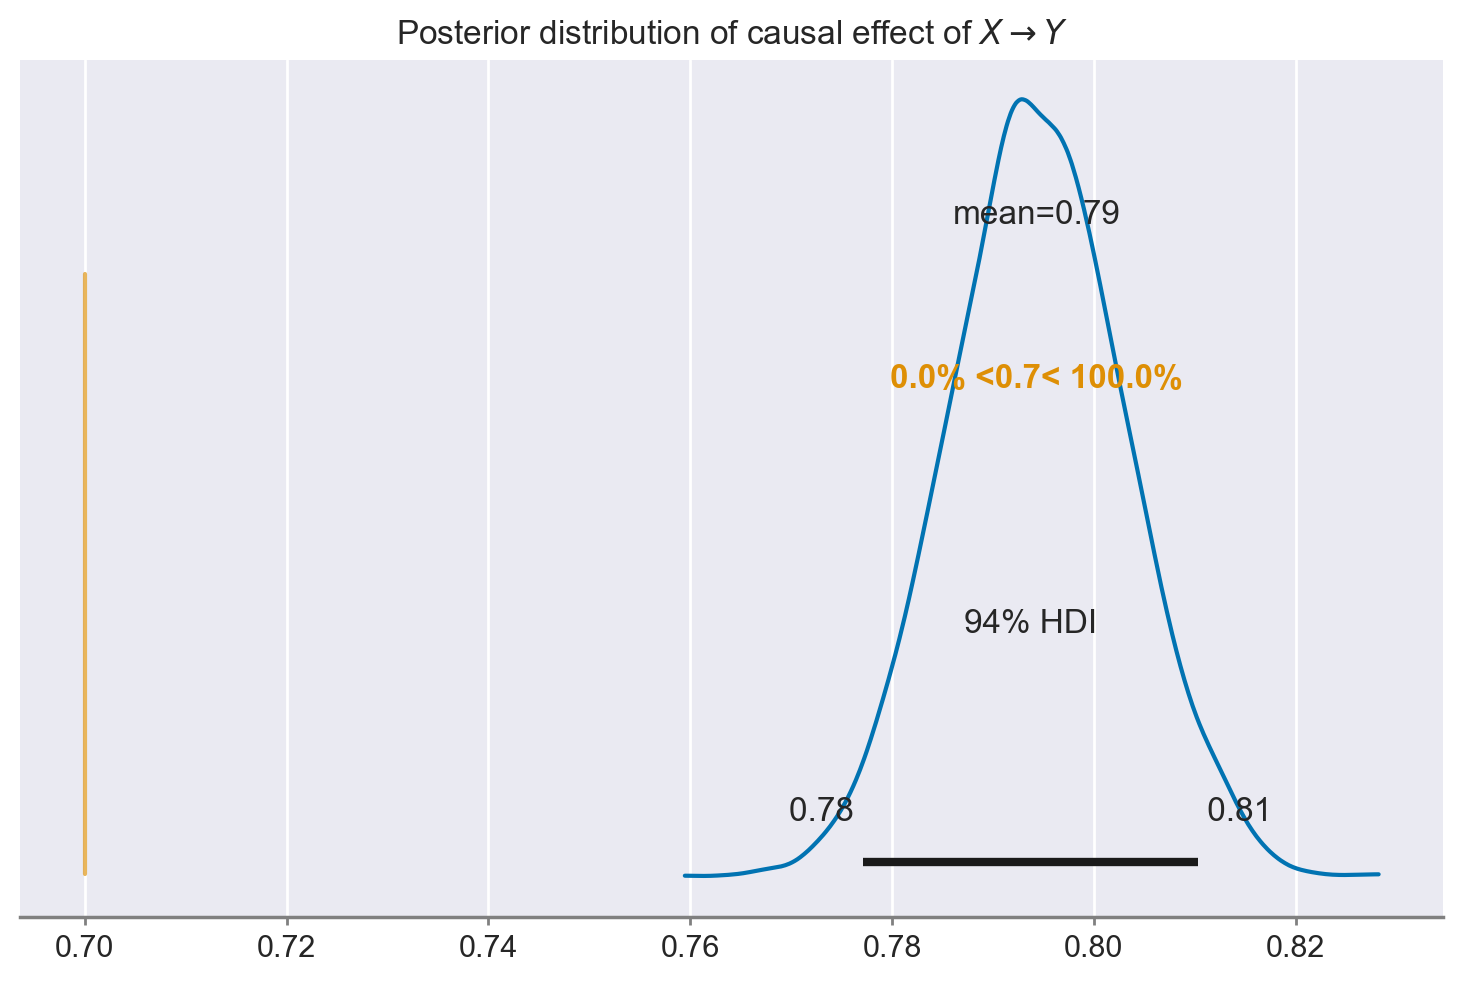

In [6]:
ax = az.plot_posterior(results.posterior["X"], ref_val=0.7)
ax.set_title(r"Posterior distribution of causal effect of $X \rightarrow Y$");

In [7]:
model = bmb.Model("Y ~ Q + X + P", df)
results = model.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.909428


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:  15%|███████▉                                             | 300/2000 [00:01<00:00, 2956.69it/s]

Running chain 0:  25%|█████████████▎                                       | 500/2000 [00:01<00:00, 4560.42it/s]

Running chain 3:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3625.36it/s]

Running chain 1:  25%|█████████████▎                                       | 500/2000 [00:01<00:00, 4462.30it/s]

Running chain 1:  55%|████████████████████████████▌                       | 1100/2000 [00:01<00:00, 5268.59it/s]

Running chain 2:  50%|██████████████████████████                          | 1000/2000 [00:01<00:00, 4884.13it/s]

Running chain 3:  55%|████████████████████████████▌                       | 1100/2000 [00:01<00:00, 5097.93it/s]

Running chain 0:  60%|███████████████████████████████▏                    | 1200/2000 [00:01<00:00, 5422.71it/s]

Running chain 1:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:01<00:00, 5281.78it/s]

Running chain 2:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:01<00:00, 5003.39it/s]

Running chain 3:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:01<00:00, 5272.58it/s]

Running chain 0:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:01<00:00, 5362.89it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1061.05it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1061.65it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1062.35it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1063.01it/s]

Sampling time = 0:00:01.969312


Transforming variables...


Transformation time = 0:00:00.049262


Computing Log Likelihood...


Log Likelihood time = 0:00:00.245659


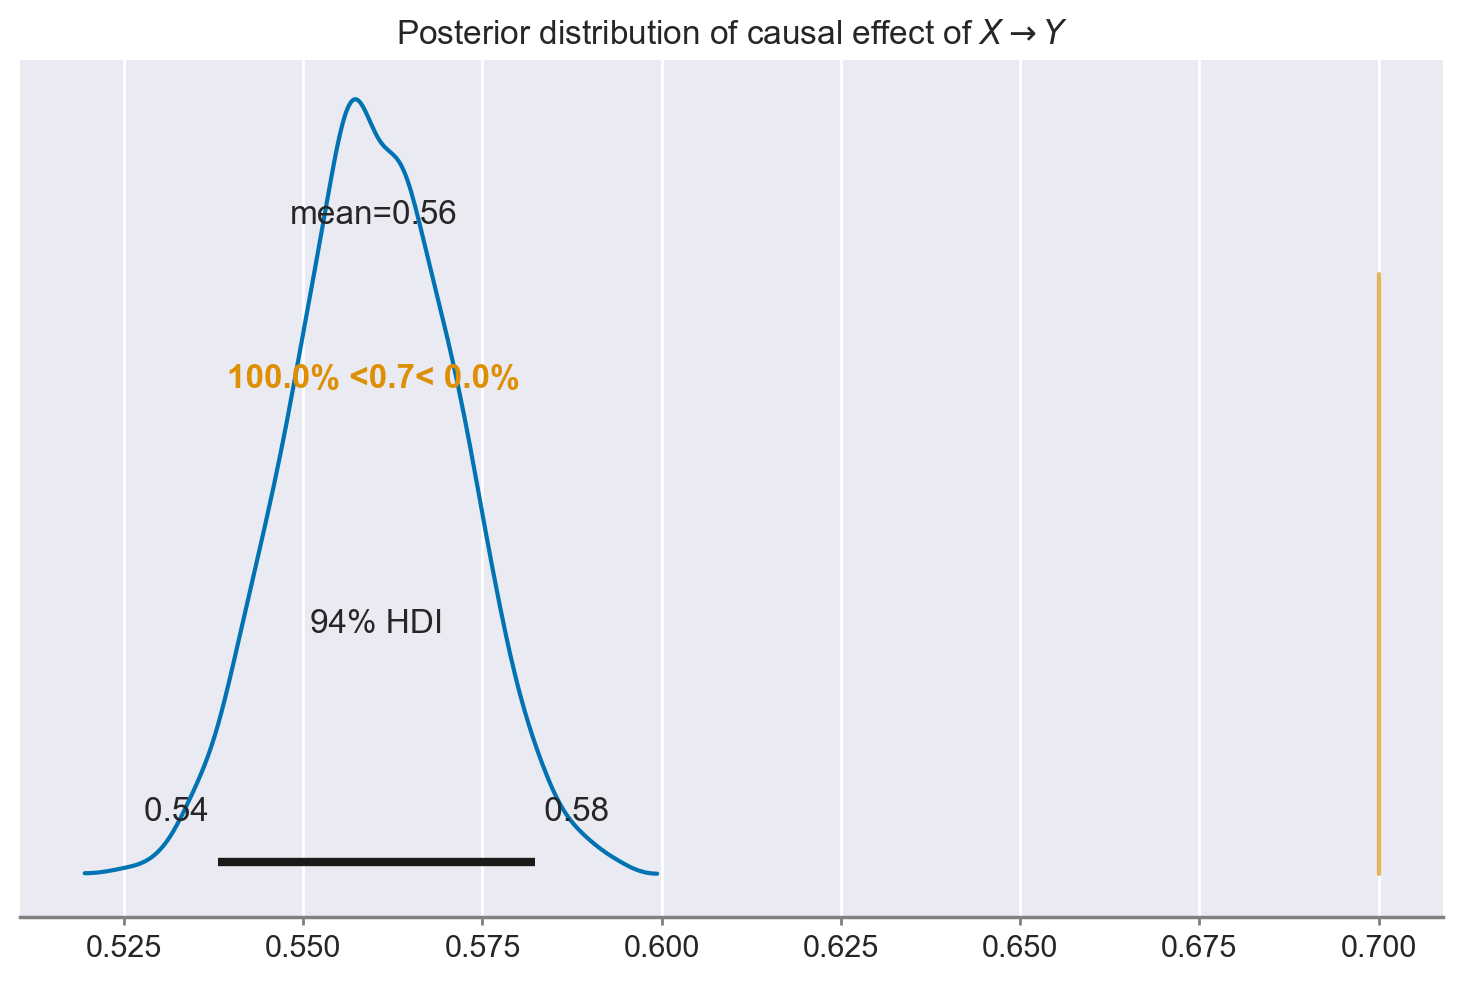

In [8]:
ax = az.plot_posterior(results.posterior["X"], ref_val=0.7)
ax.set_title(r"Posterior distribution of causal effect of $X \rightarrow Y$");

In [9]:
model = bmb.Model("Y ~ X + Q", df)
results = model.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.633067


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:  30%|███████████████▉                                     | 600/2000 [00:01<00:00, 5896.92it/s]

Running chain 1:  30%|███████████████▉                                     | 600/2000 [00:01<00:00, 5798.06it/s]

Running chain 2:  25%|█████████████▎                                       | 500/2000 [00:01<00:00, 4728.76it/s]

Running chain 0:  25%|█████████████▎                                       | 500/2000 [00:01<00:00, 4491.96it/s]

Running chain 1:  70%|████████████████████████████████████▍               | 1400/2000 [00:01<00:00, 6999.14it/s]

Running chain 3:  70%|████████████████████████████████████▍               | 1400/2000 [00:01<00:00, 6724.55it/s]

Running chain 2:  65%|█████████████████████████████████▊                  | 1300/2000 [00:01<00:00, 6356.43it/s]

Running chain 0:  65%|█████████████████████████████████▊                  | 1300/2000 [00:01<00:00, 6283.94it/s]

Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 6579.51it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 6400.25it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1201.97it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1202.67it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1203.41it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1204.11it/s]


Sampling time = 0:00:01.845490


Transforming variables...


Transformation time = 0:00:00.043659


Computing Log Likelihood...


Log Likelihood time = 0:00:00.177262


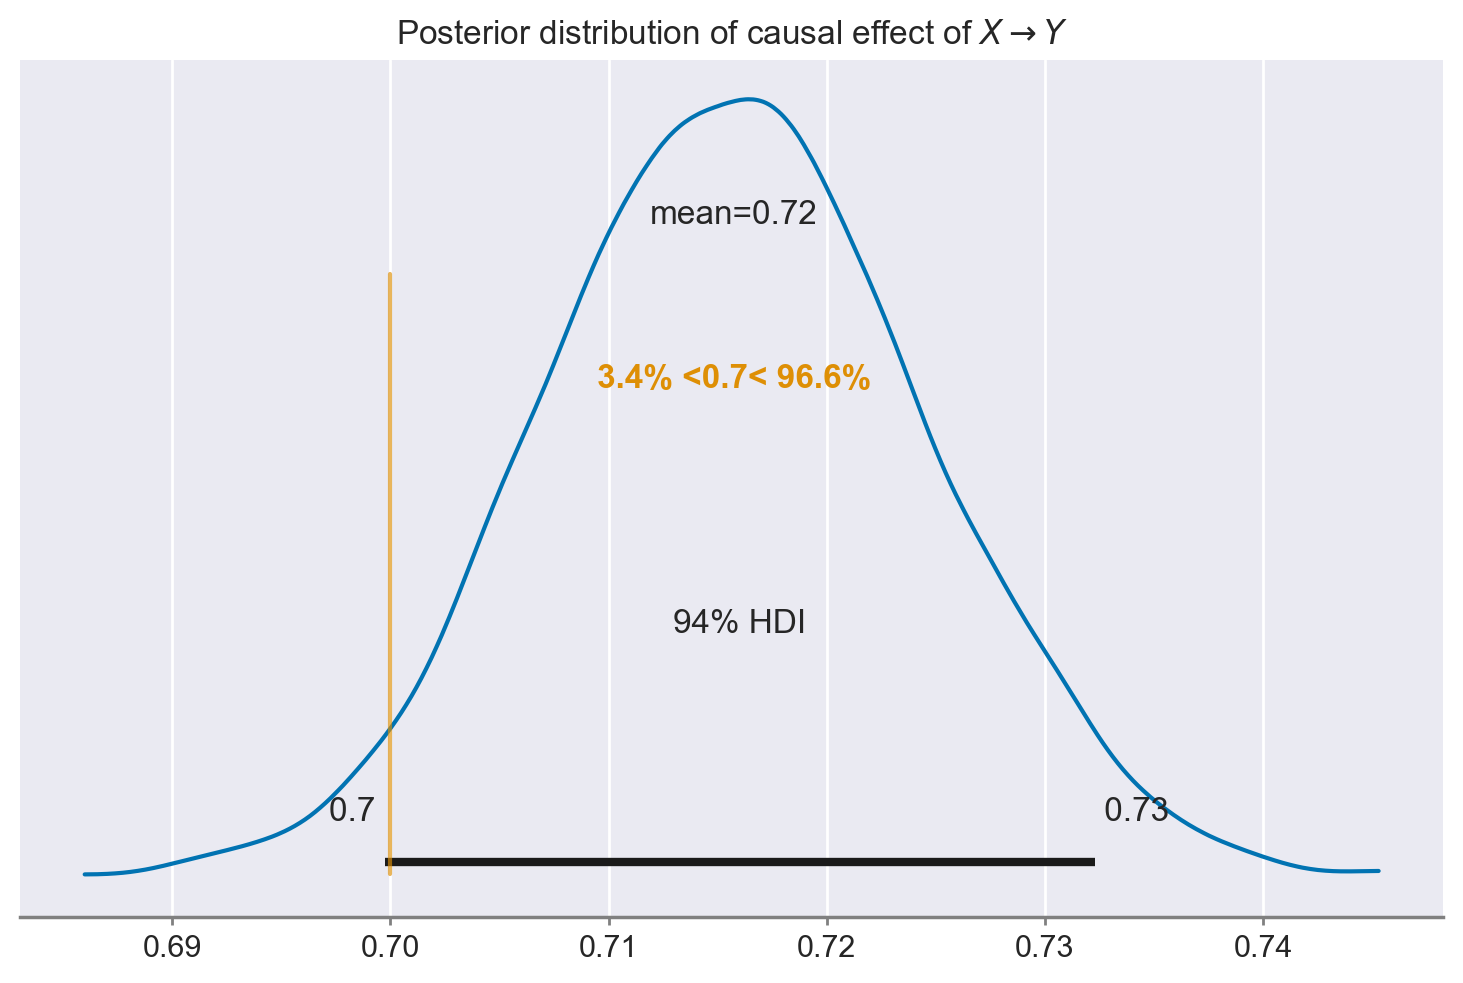

In [10]:
ax = az.plot_posterior(results.posterior["X"], ref_val=0.7)
ax.set_title(r"Posterior distribution of causal effect of $X \rightarrow Y$");

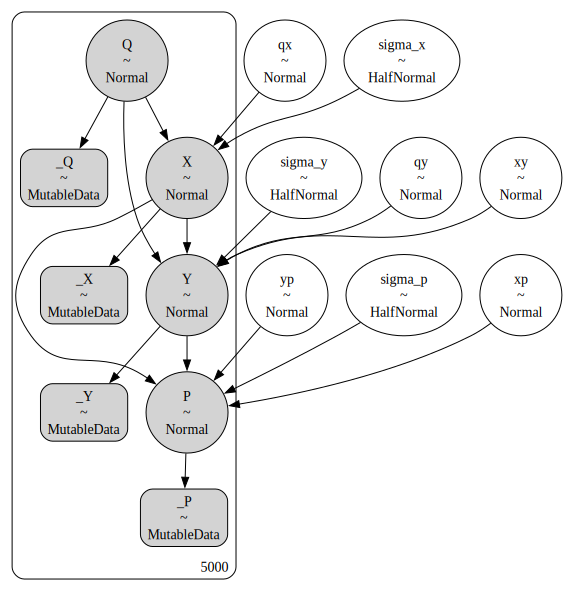

In [11]:
with pm.Model() as model:
    # data
    _Q = pm.MutableData("_Q", df["Q"])
    _X = pm.MutableData("_X", df["X"])
    _Y = pm.MutableData("_Y", df["Y"])
    _P = pm.MutableData("_P", df["P"])

    # priors on slopes
    # x ~ q
    qx = pm.Normal("qx")
    # y ~ x + q
    xy = pm.Normal("xy")
    qy = pm.Normal("qy")
    # p ~ x + y
    xp = pm.Normal("xp")
    yp = pm.Normal("yp")

    # priors on sd's
    sigma_x = pm.HalfNormal("sigma_x")
    sigma_y = pm.HalfNormal("sigma_y")
    sigma_p = pm.HalfNormal("sigma_p")
    
    # model
    Q = pm.Normal("Q", observed=_Q)
    X = pm.Normal("X", mu=qx*Q, sigma=sigma_x, observed=_X)
    Y = pm.Normal("Y", mu=xy*X + qy*Q, sigma=sigma_y, observed=_Y)
    P = pm.Normal("P", mu=xp*X + yp*Y, sigma=sigma_p, observed=_P)

pm.model_to_graphviz(model)

In [12]:
with model:
    idata = pm.sampling_jax.sample_numpyro_nuts(idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:01.122051


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:  10%|█████▎                                               | 200/2000 [00:02<00:01, 1283.25it/s]

Running chain 0:  10%|█████▎                                               | 200/2000 [00:02<00:01, 1145.76it/s]

Running chain 2:  10%|█████▎                                               | 200/2000 [00:02<00:01, 1112.33it/s]

Running chain 3:  10%|█████▍                                                | 200/2000 [00:02<00:01, 940.93it/s]

Running chain 1:  20%|██████████▌                                          | 400/2000 [00:02<00:01, 1446.97it/s]

Running chain 2:  20%|██████████▌                                          | 400/2000 [00:02<00:01, 1444.66it/s]

Running chain 0:  20%|██████████▌                                          | 400/2000 [00:02<00:01, 1388.63it/s]

Running chain 3:  20%|██████████▌                                          | 400/2000 [00:02<00:01, 1365.02it/s]

Running chain 2:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 1639.26it/s]

Running chain 1:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 1578.47it/s]

Running chain 0:  35%|██████████████████▌                                  | 700/2000 [00:02<00:00, 1755.61it/s]

Running chain 3:  35%|██████████████████▌                                  | 700/2000 [00:02<00:00, 1706.35it/s]

Running chain 2:  45%|███████████████████████▊                             | 900/2000 [00:02<00:00, 1970.25it/s]

Running chain 1:  45%|███████████████████████▊                             | 900/2000 [00:02<00:00, 1873.75it/s]

Running chain 0:  50%|██████████████████████████                          | 1000/2000 [00:02<00:00, 1965.60it/s]

Running chain 3:  50%|██████████████████████████                          | 1000/2000 [00:02<00:00, 1903.48it/s]

Running chain 1:  55%|████████████████████████████▌                       | 1100/2000 [00:02<00:00, 1907.06it/s]

Running chain 2:  60%|███████████████████████████████▏                    | 1200/2000 [00:02<00:00, 2046.40it/s]

Running chain 0:  60%|███████████████████████████████▏                    | 1200/2000 [00:02<00:00, 1958.84it/s]

Running chain 3:  60%|███████████████████████████████▏                    | 1200/2000 [00:02<00:00, 1908.91it/s]

Running chain 1:  70%|████████████████████████████████████▍               | 1400/2000 [00:02<00:00, 2020.80it/s]

Running chain 2:  75%|███████████████████████████████████████             | 1500/2000 [00:02<00:00, 2117.15it/s]

Running chain 3:  70%|████████████████████████████████████▍               | 1400/2000 [00:02<00:00, 1889.53it/s]

Running chain 0:  75%|███████████████████████████████████████             | 1500/2000 [00:02<00:00, 2008.27it/s]

Running chain 1:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:02<00:00, 2055.83it/s]

Running chain 3:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:02<00:00, 1900.20it/s]

Running chain 2:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:02<00:00, 2141.68it/s]

Running chain 0:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:02<00:00, 2058.89it/s]

Running chain 3:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:02<00:00, 1917.43it/s]

Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 2086.92it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 673.29it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 673.49it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 673.82it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 674.08it/s]


Sampling time = 0:00:03.069292


Transforming variables...


Transformation time = 0:00:00.066893


Computing Log Likelihood...


Log Likelihood time = 0:00:00.721006


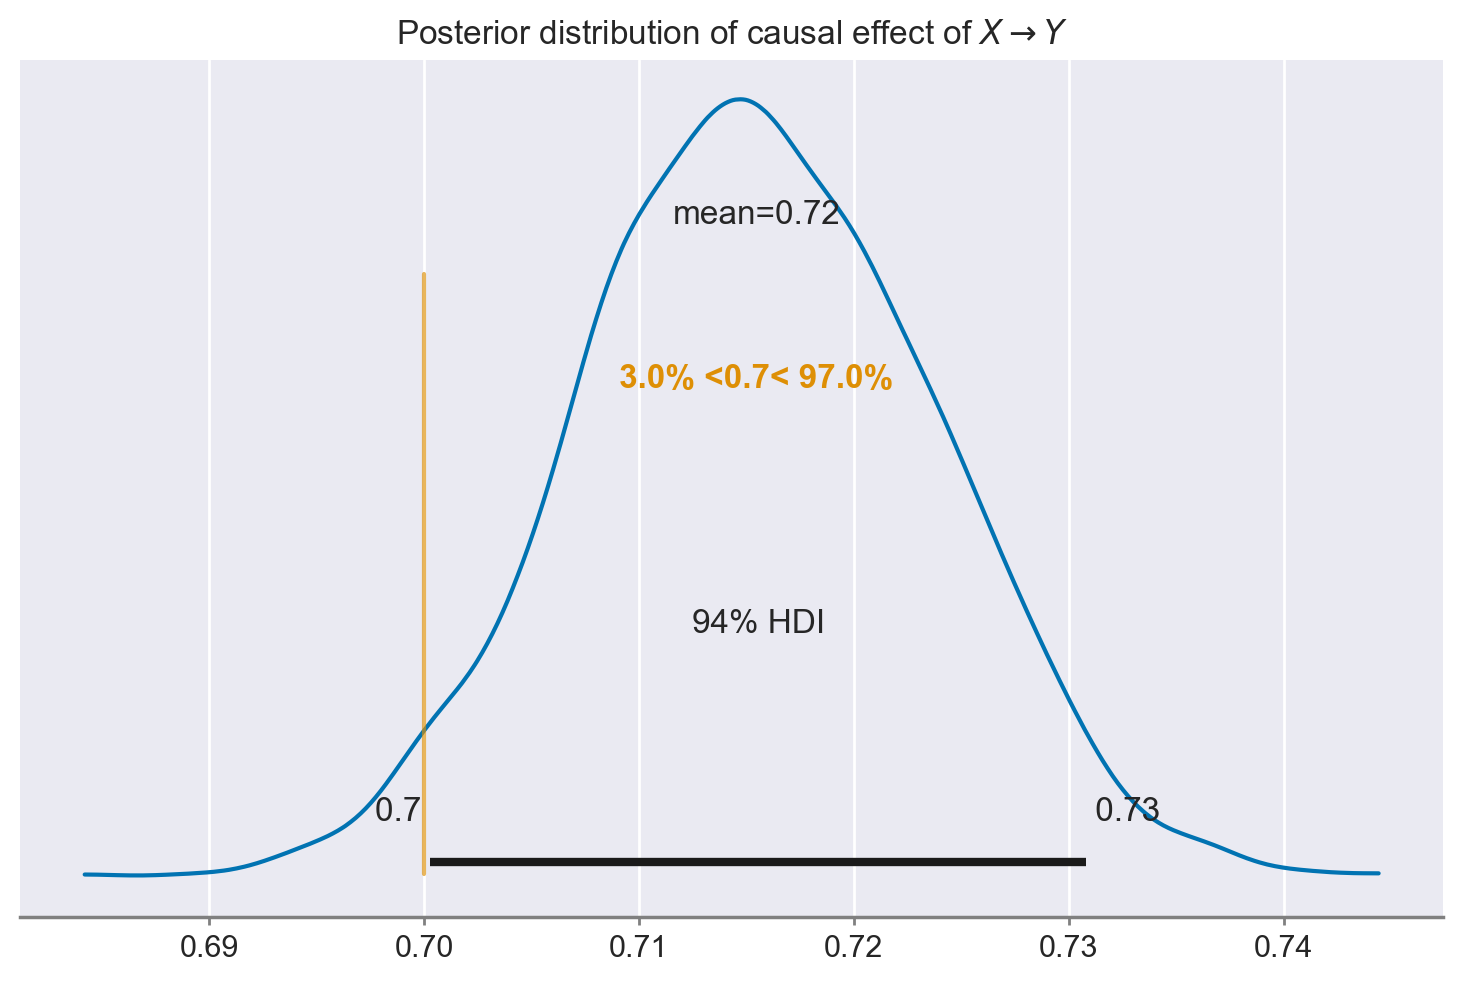

In [13]:
ax = az.plot_posterior(idata, var_names="xy", ref_val=0.7)
ax.set_title(r"Posterior distribution of causal effect of $X \rightarrow Y$");

In [14]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Tue Jan 30 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

graphviz   : 0.20.1
scipy      : 1.11.4
arviz      : 0.17.0
numpy      : 1.26.2
bambi      : 0.13.0
pymc       : 5.10.3
statsmodels: 0.14.1
seaborn    : 0.13.0
matplotlib : 3.8.2
pandas     : 2.1.4
networkx   : 3.2.1

Watermark: 2.4.3

